# 构造数据集

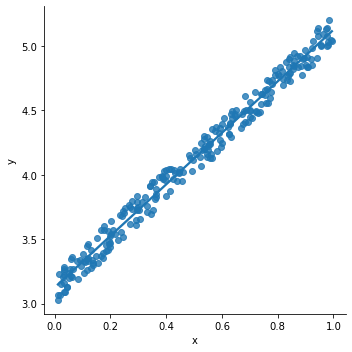

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"

k, b = 2, 3
x = np.random.rand(256)
noise = np.random.rand(256) / 4
y = k * x + b + noise

df = pd.DataFrame()
df['x'], df['y'] = x, y
sns.lmplot(x ='x', y ='y', data = df)

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

## 搭建模型 & 实例化

In [20]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.linear(x)

model = LinearRegression(x_train.shape[1], y_train.shape[1]).to(device)
print(model)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## 参数优化

In [21]:
loss_fn = nn.MSELoss()
[w, b] = model.parameters()
def get_param_values():
   return w.data[0][0], b.data[0]

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

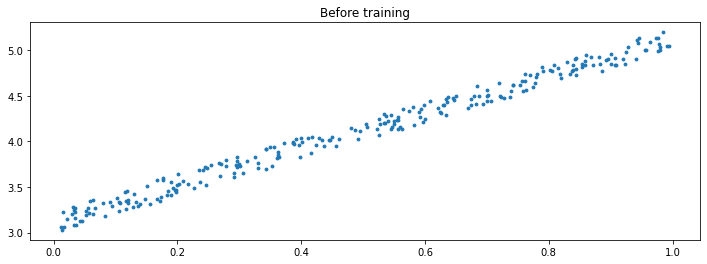

In [22]:
def plot_current_fit(title = ""):
    plt.figure(figsize = (12,4))
    plt.title(title)
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = x1 * w1 + b1
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()
plot_current_fit('Before training')